<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/master/S8/EVA4_S8_Solution_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session8 : CIFAR 10

**Target**: 


*   Extract the ResNet18 model from this repository and add it to your API/repo.
*   Use your data loader, model loading, train, and test code to train ResNet18 on Cifar10
*   Target is 85% accuracy. No limit on the number of epochs. Use default ResNet18 code (so params are fixed). 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 85% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Libraries

In [1]:
from __future__ import print_function

import torch.optim as optim    #Optimizatin functions like SGD, ADAMS,
import numpy as np

# Plottting libraries
import matplotlib.pyplot as plt

%matplotlib inline

# Load modules/models from EVA course
!rm -rf EVA4
!git clone https://github.com/sujitojha1/EVA4

Cloning into 'EVA4'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 77 (delta 11), reused 56 (delta 9), pack-reused 0
Unpacking objects: 100% (77/77), done.



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *
cifar10 = dataset_cifar10(sample=False,batch_size=128)
sample_cifar10 = dataset_cifar10(sample=True,batch_size=5)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=True)

classes = cifar10.classes

CUDA availability ? True
CUDA availability ? True



Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
# Load train data as numpy array
train_data = sample_cifar10.data(train_flag=True).data
test_data = sample_cifar10.data(train_flag=False).data

total_data = np.concatenate((train_data, test_data), axis=0)
print(total_data.shape)
print(total_data.mean(axis=(0,1,2))/255)
print(total_data.std(axis=(0,1,2))/255)
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified
 truck   bird   ship   frog   frog


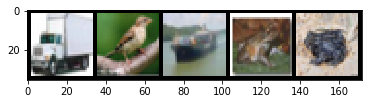

In [4]:
import torchvision

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

# get some random training images
dataiter = iter(sample_cifar10.loader(train_flag=True))
images,labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%6s' % classes[labels[j]] for j in range(5)))

# The Model

In [5]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training and Testing

In [10]:
# Load train and test model
from EVA4.Modules import *

global train_losses, test_losses, train_acc, test_acc
train_losses = test_losses = train_acc = test_acc = []

for epoch in range(11):  # loop over the dataset multiple times

    train(net, device, testloader, optimizer, criterion, epoch)
    test(net, device, testloader, optimizer, criterion)

print('Finished Training')


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


NameError: ignored

In [9]:
train_losses

[]

# display an image from the test set

Files already downloaded and verified
GroundTruth:  horse  bird truck truck


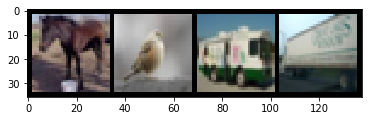

In [0]:
dataiter = iter(sample_cifar10.loader(train_flag=True))
images, labels = dataiter.next()


# print images
imshow(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Prediction of sampe test set

In [0]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  bird truck  ship


# Evaluating Train Accuracy

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 88 %


# Evaluating Test Accuracy

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


# Evaluating test Accuracy over different classes 

In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 81 %
Accuracy of   cat : 82 %
Accuracy of  deer : 83 %
Accuracy of   dog : 79 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 91 %
Accuracy of truck : 89 %
